In [55]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using OffsetArrays
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("../Scripts/Impurity.jl")
includet("Hofstadter_SP.jl")

In [56]:
Nx = 5
Ny = 5
p = 1
q = 5
pn = 2
U = 2

N = Nx*Ny
N_Site = N
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 10
Vrand = 1e-3
NPin = 1

1

In [57]:
Cut_Off

5

In [58]:
matrix = Hofstadter_SP(Nx, Ny, p/q, 0);

In [59]:
V0 = [V]; Imp_Site = [1]
Impurity_Data = Impurity(V0, Imp_Site);

In [60]:
ParameterInfo(NPin, pn, Nx, Ny, p, q)


 Lattice Size: 5x5
 The Number of Flux per Unit-Cell (ϕ) = 1//5
 Filling Fraction (ν) = 2//5 (The Number of Quasiholes = 1)
 The Number of Flux Quanta = 4 (Delocalised Number = 0)
The Total Number of Particle = 2
 The Effective Filling = 1//2
The Number of Ground State Degeneracy = 2


# PROJECTION

#### Hard-Core: On

In [61]:
HardCore = true
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [62]:
Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand);

In [63]:
Total_H = HHubbard + Impurity_H;

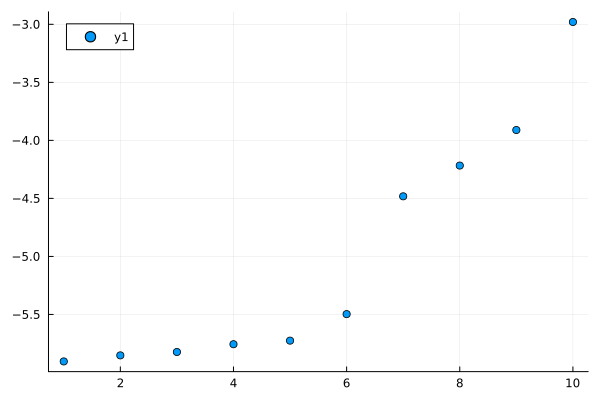

In [64]:
ϵ_proj_hard_core, psi = eigenstates(Total_H);
scatter(ϵ_proj_hard_core)

#### Hard-Core: Off

In [65]:
HardCore = false
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [66]:
Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand);

In [67]:
Total_H = HHubbard + Impurity_H;

In [68]:
ϵ_proj_finite, λ_proj_finite = eigenstates(Total_H);

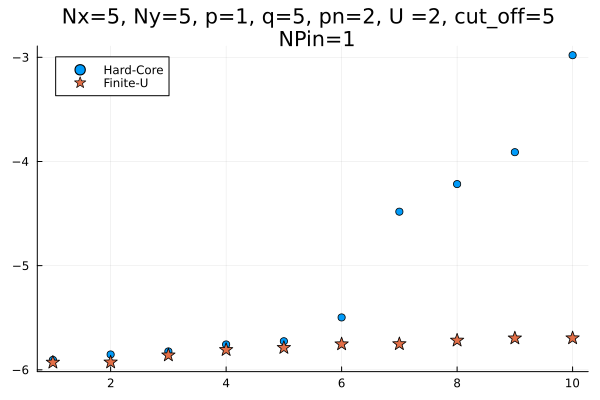

In [69]:
n = 1 
m = 10

scatter(ϵ_proj_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")
scatter!(ϵ_proj_finite[n:m], markershape=:star,markersize=7, label="Finite-U")

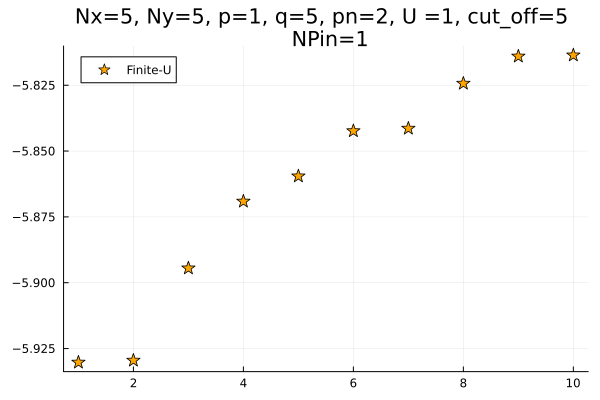

In [37]:
scatter(ϵ_proj_finite[n:m], markershape=:star,markersize=7, color=:orange, label="Finite-U",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")

# WITHOUT PROJECTION

#### Hard-Core: On

In [140]:
HardCore = true
HHubbard, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [141]:
Impurity_H = Imp_H(Number_MB_Operator_List, Impurity_Data, Vrand);

In [142]:
Total_H = HHubbard + Impurity_H;

In [143]:
ϵ_hard_core, psi = eigenstates(dense(Total_H));

#### Hard-Core: Off

In [144]:
HardCore = false
HHubbard, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [145]:
Impurity_H = Imp_H(Number_MB_Operator_List, Impurity_Data, Vrand);

In [146]:
Total_H = HHubbard + Impurity_H;

In [147]:
ϵ_finite_u, psi = eigenstates(dense(Total_H));

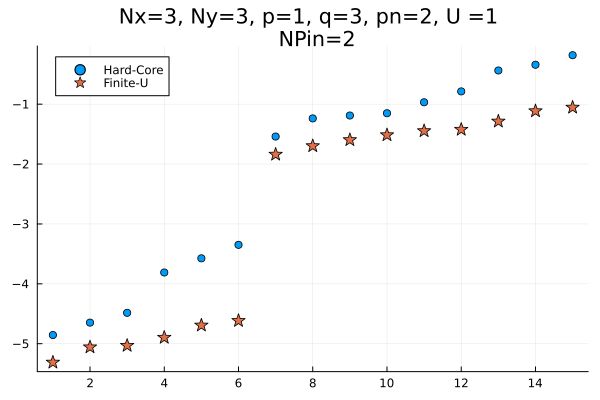

In [148]:
n = 1 
m = 15

scatter(ϵ_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n NPin=$(NPin)")
scatter!(ϵ_finite_u[n:m], markershape=:star,markersize=7, label="Finite-U")

# CHECK WHETHER IF PROJECTION CODE WORKING CORRECTLY !

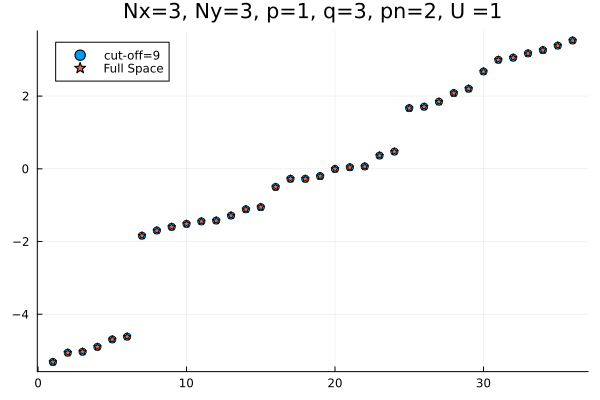

In [149]:
n=1
m=36
scatter(ϵ_proj_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(ϵ_finite_u[n:m], label="Full Space",marker=:star)